In [10]:
%matplotlib inline

In [11]:
import numpy as np
import sklearn.svm as svm
import seaborn as sns
sns.set_style("whitegrid")

from sklearn import cross_validation as cv
from sklearn.datasets import load_iris
from sklearn.learning_curve import validation_curve, learning_curve

# Machine Learning Assignment 1 : Support Vector Machine - Over Fitting Problem

### Function: Plot the Validation Curve of the Support Vector Machine

In [12]:
def plotValidationCurve(estimator, title, X, y, param_name, param_range, cv=5):
    trainScores, testScores = validation_curve(estimator, X, y, param_name=param_name, param_range=param_range, cv=cv, scoring="accuracy", )

    trainScoresMean = np.mean(trainScores, axis=1)
    trainScoresStd = np.std(trainScores, axis=1)
    testScoresMean = np.mean(testScores, axis=1)
    testScoresStd = np.std(testScores, axis=1)
    
    sns.plt.figure(figsize=(15,8))
    sns.plt.title(title)
    sns.plt.xlabel(param_name)
    sns.plt.ylabel("Accuracy Score")
    sns.plt.ylim(0.0, 1.1)
    sns.plt.semilogx(param_range, trainScoresMean, label="Training score", color="r")
    sns.plt.fill_between(param_range, trainScoresMean - trainScoresStd, trainScoresMean + trainScoresStd, alpha=0.2, color="r")
    sns.plt.semilogx(param_range, testScoresMean, label="Cross-validation score",color="b")
    sns.plt.fill_between(param_range, testScoresMean - testScoresStd, testScoresMean + testScoresStd, alpha=0.2, color="b")

    sns.plt.legend(loc="best")
    return sns.plt

### Function: Plot the Learning Curve of the Support Vector Machine

In [13]:
def plotLearningCurve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    sns.plt.figure(figsize=(15,10))
    sns.plt.title(title)
    if ylim is not None:
        sns.plt.ylim(*ylim)
    sns.plt.xlabel("Training examples")
    sns.plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    sns.plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,
                         alpha=0.1, color="r")
    sns.plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    sns.plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    sns.plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    sns.plt.legend(loc="best")
    return sns.plt

# Load the Iris Dataset and describe its contents

### The Iris data set is a multi class classification problem. It contains 150 samples, 50 of each class and 4 unique features.

In [14]:
iris = load_iris()

X = np.array(iris.data)
y = np.array(iris.target)

print("Number of data points : ", len(y))
print("No of features : ", X.shape[1])
print("No of classes : ", len(set(y)))
print("\nFeature Names : ", iris.feature_names)
print("Class Names : ", iris.target_names, "\n")

Number of data points :  150
No of features :  4
No of classes :  3

Feature Names :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Class Names :  ['setosa' 'versicolor' 'virginica'] 



# Validation Curve with respect to Regularization factor 'C'

### The validation curve is a method to measure whether a classifier (in this case - Support Vector Machine) is over fitting or under fitting. It validates the classifier using a single attribute of the classifier which is used for regularization.

### Initially, we will look at the regularization factor 'C', which controls whether the SVM overfits or underfits. Test case is on the range of C = [10^-2 to 10^6]

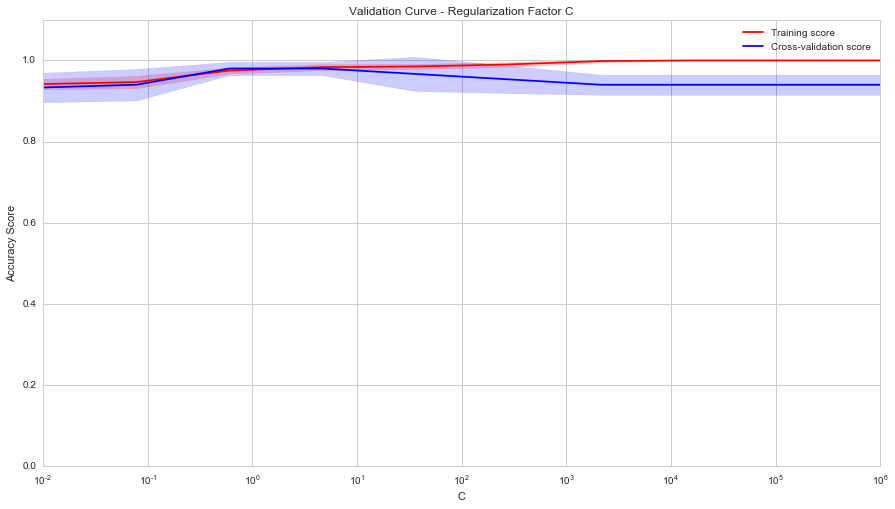

In [15]:
Cs = np.logspace(-2, 6, 10)
title = "Validation Curve - Regularization Factor C"

plot = plotValidationCurve(svm.SVC(random_state=0), title, X, y, param_name="C", param_range=Cs, cv=5)
plot.show()

### As seen, Accuracy is maximum for both training and crossvalidated score when C is in the range [0-10]. After this threshold, training score remains high at 100 %, but cross validation prooves that accuracy degrades to the 94 % accuracy score. This is due to overfitting problem.

### As a side note, for values of C in the range [0.01 to 0], Accuracy for both the learning algorithm and the cross validated svm is lower than the true maximum, showing that the SVM is underfitting.

# Validation Curve with respect to Regularization factor 'gamma'

### Next, we use the fine tuning regularization factor 'Gamma' in order to avoid over fitting.

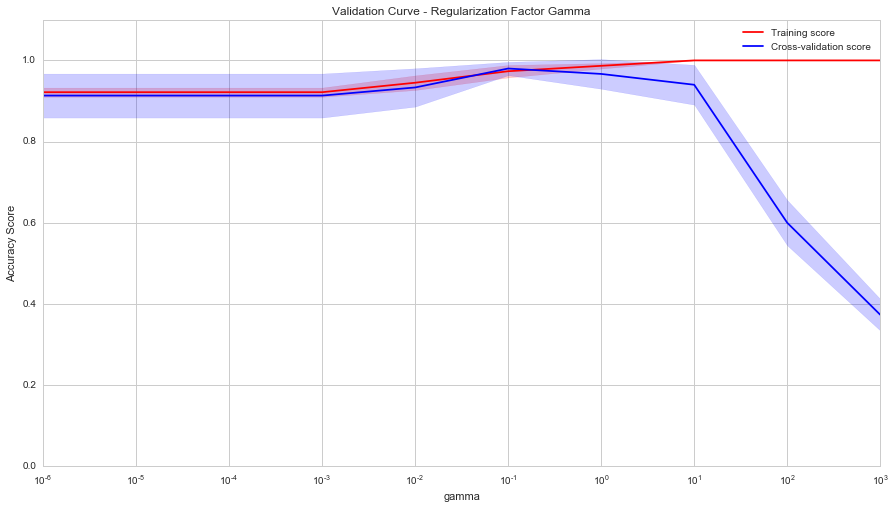

In [16]:
gammas = np.logspace(-6, 3, 10)
title = "Validation Curve - Regularization Factor Gamma"

plot = plotValidationCurve(svm.SVC(random_state=0), title, X, y, param_name="gamma", param_range=gammas, cv=5)
plot.show()

### Gamma is a factor that needs to be fine tuned in order to avoid overfitting the data set. As seen, when gamma is greater than 0.1, the crossvalidation accuracy score drops drastically, while the training score remains 100 %. This is indicative of overfitting problem.

# Learning Curve - Support Vector Machine

### The learning curve shows us how the SVM classifier learns the given data. Given a standard SVM with C = 1 and gamma = 0.1, it is clear that the SVM does not overfit under such constraints

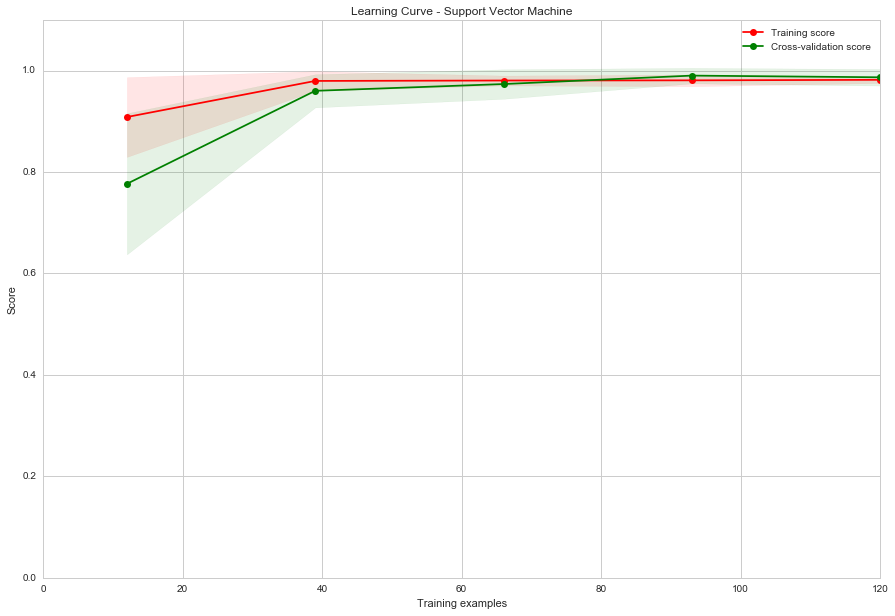

In [17]:
crossValidation = cv.ShuffleSplit(X.shape[0], n_iter=10, test_size=0.20, random_state=0)
title = "Learning Curve - Support Vector Machine"

plot = plotLearningCurve(svm.SVC(random_state=0), title, X, y, ylim=(0.0, 1.1), cv=crossValidation)
plot.show()

### As seen in this case, an SVM with parameters C = 1000 and gamma = 10, the cross validation accuracy score is lower. This is due to overfitting of the data set by the SVM.

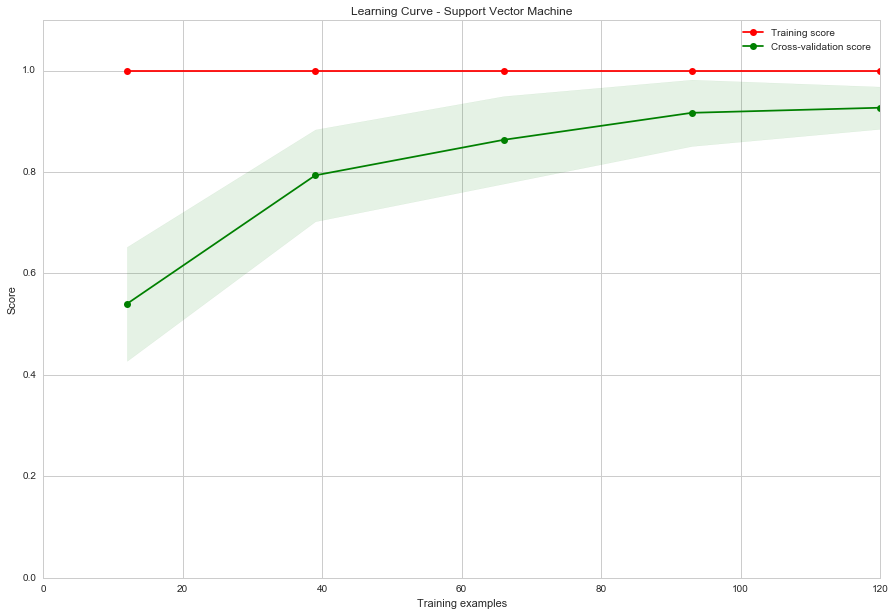

In [18]:
crossValidation = cv.ShuffleSplit(X.shape[0], n_iter=10, test_size=0.20, random_state=0)
title = "Learning Curve - Support Vector Machine"

plot = plotLearningCurve(svm.SVC(C=1000, gamma=10, random_state=0), title, X, y, ylim=(0.0, 1.1), cv=crossValidation)
plot.show()